In [ ]:
import pandas as pd
import os
import scipy.stats as stats
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('heart.xlsx')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['target'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
target    0   1
sex            
0        24  72
1       114  93


<Figure size 800x600 with 0 Axes>

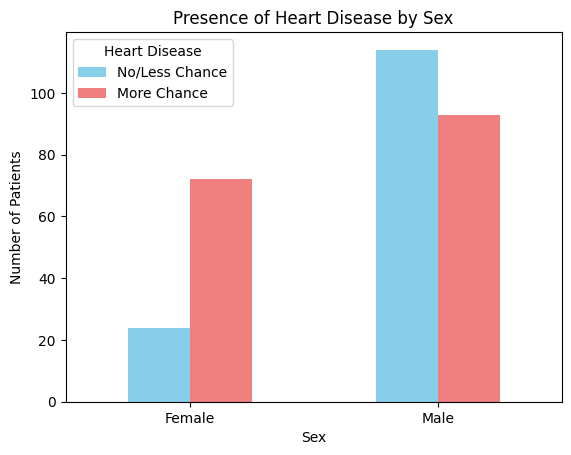

In [ ]:
contingency_table.columns = ['No/Less Chance', 'More Chance']
contingency_table.index = ['Female', 'Male']

# Plot the data
plt.figure(figsize=(8, 6))
contingency_table.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])
plt.title('Presence of Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease')
plt.show()

In [ ]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("\nConclusion: There is a statistically significant difference in the presence of heart disease between male and female patients.")
else:
    print("\nConclusion: There is no statistically significant difference in the presence of heart disease between male and female patients.")



Chi-Square Test Results:
Chi-Square Statistic: 22.717227046576355
P-value: 1.8767776216941503e-06
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 43.72277228  52.27722772]
 [ 94.27722772 112.72277228]]

Conclusion: There is a statistically significant difference in the presence of heart disease between male and female patients.


In [ ]:
# Create a contingency table of 'sex' vs. 'target'
contingency_table = pd.crosstab(df["sex"], df["target"])

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpretation
if p < 0.05:
    print("There is a significant difference between male and female patients regarding heart disease presence.")
else:
    print("There is no significant difference between male and female patients regarding heart disease presence.")


Chi-square statistic: 22.717227046576355
p-value: 1.8767776216941503e-06
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 43.72277228  52.27722772]
 [ 94.27722772 112.72277228]]
There is a significant difference between male and female patients regarding heart disease presence.


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Min-Max Normalization
min_max_scaler = MinMaxScaler()
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)


Min-Max Normalized Data:
          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053   
1    0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496   
2    0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992   
3    0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794   
4    0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290   
..        ...  ...       ...       ...       ...  ...      ...       ...   
298  0.583333  0.0  0.000000  0.433962  0.262557  0.0      0.5  0.396947   
299  0.333333  1.0  1.000000  0.150943  0.315068  0.0      0.5  0.465649   
300  0.812500  1.0  0.000000  0.471698  0.152968  1.0      0.5  0.534351   
301  0.583333  1.0  0.000000  0.339623  0.011416  0.0      0.5  0.335878   
302  0.583333  0.0  0.333333  0.339623  0.251142  0.0      0.0  0.786260   

     exang   oldpeak  slope    ca      thal  target  
0      

In [ ]:
# Z-Score Standardization
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
print("\nZ-Score Standardized Data:")
print(df_standardized)


Z-Score Standardized Data:
          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1   -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2   -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3    0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4    0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464 -1.468418 -0.938515  0.478391 -0.101730 -0.417635  0.898962   
299 -1.033002  0.681005  1.973123 -1.234996  0.342756 -0.417635  0.898962   
300  1.503641  0.681005 -0.938515  0.706843 -1.029353  2.394438  0.898962   
301  0.290464  0.681005 -0.938515 -0.092738 -2.227533 -0.417635  0.898962   
302  0.290464 -1.468418  0.032031 -0.092738 -0.198357 -0.417635 -1.005832   

      thalach     exang   oldpeak     slope    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler  # For scaling

In [ ]:
# Step 1: Data Preparation
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 3: Feature Selection (Recursive Feature Elimination)
model = LogisticRegression(max_iter=1000)  # Increase max_iter
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

In [ ]:
# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['sex', 'cp', 'exang', 'oldpeak', 'ca'], dtype='object')


In [ ]:
# Step 4: Model Development
model.fit(X_train_rfe, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Step 5: Model Interpretation
print("\nModel Coefficients:")
for feature, coef in zip(selected_features, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Model Coefficients:
sex: -0.6552
cp: 0.8426
exang: -0.6848
oldpeak: -0.9797
ca: -0.7242


In [ ]:
# Step 6: Model Evaluation
y_pred = model.predict(X_test_rfe)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8688524590163934

Confusion Matrix:
[[26  3]
 [ 5 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

